**OBJECTIVE:** Run modSAR algorithm on QSAR datasets 

In [1]:
import math
import numpy as np
import pandas as pd

# Import relevant modSAR classes 
from modSAR.network_algorithms import ModSAR
from modSAR.cdk_utils import CDKUtils
from modSAR.datasource import GenericFileDataSource
from modSAR.preprocessing import *

#from gevent import monkey
#monkey.patch_all()

# 2.5uM in Log units
CUTOFF_ACTIVITY = - np.log10(2.5e-06)

%matplotlib inline

/opt/conda/lib/python3.6/site-packages/grequests.py:21: MonkeyPatchWarning: Monkey-patching ssl after ssl has already been imported may lead to errors, including RecursionError on Python 3.6. It may also silently lead to incorrect behaviour on Python 3.7. Please monkey-patch earlier. See https://github.com/gevent/gevent/issues/1016. Modules that had direct imports (NOT patched): ['urllib3.util (/opt/conda/lib/python3.6/site-packages/urllib3/util/__init__.py)', 'urllib3.contrib.pyopenssl (/opt/conda/lib/python3.6/site-packages/urllib3/contrib/pyopenssl.py)']. 
  curious_george.patch_all(thread=False, select=False)


# Load Data

In [2]:
# Read annotated training set compiled by wvanhoorn 
#  https://github.com/OpenSourceMalaria/Series4_PredictiveModel/issues/1#issuecomment-523037719

X = pd.read_excel('/mnt/data/Master Chemical List - annotated.xlsx')
X['pIC50'] = -np.log10(X['Value']* 1e-06)

In [3]:
X.iloc[0]

OSM_ID                                                               OSM-A-1
Series                                                                     1
Assay                                                        Pfal IC50 (Guy)
Value                                                                   3.05
Qualifier                                                                  =
PfaI EC50 (Inh)                                                          NaN
Pfal IC50 (GSK)                                                          NaN
Pfal IC50 (Syngene)                                                      NaN
Pfal IC50 (Dundee)                                                       NaN
Pfal IC50 (Avery)                                                        NaN
Pfal (K1) IC50 (Avery)                                                   NaN
Pfal IC50 (Ralph)                                                        NaN
Pfal IC50 (Guy)                                                         3.05

In [4]:
# Save this preprocessed dataset
X.to_excel('/mnt/data/malaria_osm4_train.xlsx')

In [5]:
# Read the bioactivities in a more standard way with modSAR package

malaria_osm4 = GenericFileDataSource(target_id='malaria_osm4', 
                                     filepath='/mnt/data/malaria_osm4_train.xlsx', 
                                     smiles_column='Canonical_Smiles', 
                                     compound_id_column='OSM_ID', 
                                     activity_column='pIC50',
                                     apply_filter=True)

In [6]:
malaria_osm4.bioactivities_df.head(3)

,OSM_ID,Series,Assay,Value,Qualifier,PfaI EC50 (Inh),Pfal IC50 (GSK),Pfal IC50 (Syngene),Pfal IC50 (Dundee),Pfal IC50 (Avery),Pfal (K1) IC50 (Avery),Pfal IC50 (Ralph),Pfal IC50 (Guy),Pfal (K1) IC50 (Guy),Pfal IC50 (Batra),Pfal (K1) IC50 (Batra),Pfal (3D7) IC50 (Broad),Pfal (Dd2) IC50 (Broad),Canonical_Smiles,InChIKey,pIC50
0,OSM-A-1,1,Pfal IC50 (Guy),3.050,=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.050,4.379,NaN,NaN,NaN,NaN,Cc1cc(\C=C\2/S\C(=N/c3ccccc3)\NC2=O)c(C)n1c4cc...,ODRSSOQWOHNABY-MOSHPQCFSA-N,5.515700
1,OSM-A-1,1,Pfal (K1) IC50 (Guy),4.379,=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.050,4.379,NaN,NaN,NaN,NaN,Cc1cc(\C=C\2/S\C(=N/c3ccccc3)\NC2=O)c(C)n1c4cc...,ODRSSOQWOHNABY-MOSHPQCFSA-N,5.358625
2,OSM-A-2,1,Pfal IC50 (Guy),0.574,=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.574,1.829,NaN,NaN,NaN,NaN,Cc1cc(\C=C\2/S\C(=N/c3ccccc3)\NC2=O)c(C)n1c4cc...,LXPLFPVISCVJSC-BKUYFWCQSA-N,6.241088


In [7]:
print("Number of compounds: %d | Number of unique compounds: %d" %
      (malaria_osm4.bioactivities_df.shape[0], malaria_osm4.bioactivities_df['OSM_ID'].nunique()))

Number of compounds: 440 | Number of unique compounds: 348


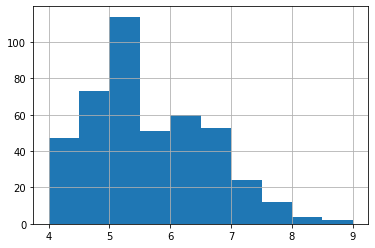

In [8]:
malaria_osm4.bioactivities_df['pIC50'].hist()

## Build QSAR Dataset

In [ ]:
# build_qsar_dataset method performs a couple of preprocessing steps:
#  1. Treats duplicated values: A compound is discarded if it has many duplicated compounds and 
#                                 sd(pIC50) > 1 in its group of measurements
#  2. Calculates Molecular Descriptors: Using CDK library (Java)
#  3. Returns a QSARDataset: a python object that encapsulates a full dataset
osm4_dataset = malaria_osm4.build_qsar_dataset()

Starting CDKBridge
(01/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.WHIMDescriptor()
(02/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.BCUTDescriptor()
(03/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.XLogPDescriptor()
(04/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.WeightDescriptor()
(05/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.RuleOfFiveDescriptor()
(06/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.RotatableBondsCountDescriptor()
(07/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.MannholdLogPDescriptor()
(08/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.LargestPiSystemDescriptor()
(09/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.LargestChainDescriptor()


ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/py4j/java_gateway.py", line 1181, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/opt/conda/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  File "/opt/conda/lib/python3.6/site-packages/gevent/_socket3.py", line 433, in recv_into
    self._wait(self._read_event)
  File "src/gevent/_hub_primitives.py", line 284, in gevent.__hub_primitives.wait_on_socket
  File "src/gevent/_hub_primitives.py", line 289, in gevent.__hub_primitives.wait_on_socket
  File "src/gevent/_hub_primitives.py", line 271, in gevent.__hub_primitives._primitive_wait
  File "src/gevent/_hub_primitives.py", line 46, in gevent.__hub_primitives.WaitOperationsGreenlet.wait
  File "src/gevent/_hub_primitives.py", line 46, in gevent.__hub_primitives.WaitOperationsGreenlet.wait
  File "src/gevent/_hub_primitives.py", line 55, in gevent

(10/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.BondCountDescriptor()
(11/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.BasicGroupCountDescriptor()
(12/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.AtomCountDescriptor()
(13/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.AromaticBondsCountDescriptor()
(14/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.AromaticAtomsCountDescriptor()
(15/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.ALOGPDescriptor()
(16/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.AcidicGroupCountDescriptor()
(17/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.SmallRingDescriptor()
(18/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.ZagrebIndexDescriptor()
(19/49) Collecting descriptors from class self.cdk.qsar.descriptors.mol

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/py4j/java_gateway.py", line 1181, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/opt/conda/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  File "/opt/conda/lib/python3.6/site-packages/gevent/_socket3.py", line 433, in recv_into
    self._wait(self._read_event)
  File "src/gevent/_hub_primitives.py", line 284, in gevent.__hub_primitives.wait_on_socket
  File "src/gevent/_hub_primitives.py", line 289, in gevent.__hub_primitives.wait_on_socket
  File "src/gevent/_hub_primitives.py", line 271, in gevent.__hub_primitives._primitive_wait
  File "src/gevent/_hub_primitives.py", line 46, in gevent.__hub_primitives.WaitOperationsGreenlet.wait
  File "src/gevent/_hub_primitives.py", line 46, in gevent.__hub_primitives.WaitOperationsGreenlet.wait
  File "src/gevent/_hub_primitives.py", line 55, in gevent

(21/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.VAdjMaDescriptor()
(22/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.VABCDescriptor()
(23/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.TPSADescriptor()
(24/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.PetitjeanNumberDescriptor()
(25/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.MDEDescriptor()
(26/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.KierHallSmartsDescriptor()
(27/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.KappaShapeIndicesDescriptor()
(28/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.HybridizationRatioDescriptor()
(29/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.FragmentComplexityDescriptor()
(30/49) Collecting descriptors from class self.cdk.qsar.descriptors.molecular.FMFD

In [ ]:
sada

## Calculate Pairwise Similarity

We need to compute the Tanimoto similarity between all compounds before running the algorithm. 

This can be done with the function `calculate_pairwise_tanimoto` from `CDKUtils` class:

In [ ]:
cdk_utils = CDKUtils()
# Pass a DataFrame and inform the column that contain SMILES code
similarity_matrix = cdk_utils.calculate_pairwise_tanimoto(metadata, smiles_column='CANONICAL_SMILES')

Similarity is encoded as a numpy matrix

In [ ]:
similarity_matrix

In [ ]:
similarity_matrix.min()

In [ ]:
similarity_matrix.max()

# Run ModSAR algorithm

Create an instance of modSAR algorithm and run `<ModSAR obj>.fit()` function with molecular descriptors, outcome variable and pairwise similarity:

In [ ]:
alg = ModSAR()
alg.fit(X, y, similarity_matrix, metadata.CANONICAL_SMILES)

## Graph

We can investigate characteristics of the graph created by modSAR by inspecting the `<modSAR obj>.instance_graph` object:

In [ ]:
alg.number_modules

In [ ]:
alg.threshold

In [ ]:
graph = alg.instance_graph

In [ ]:
print(graph)

Largest modules:

In [ ]:
module_sizes = pd.Series(alg.instance_graph.vs['community']).value_counts()
module_sizes.head(15)

In [ ]:
singletons = module_sizes.index[module_sizes == 1]
non_singletons = module_sizes.index[module_sizes != 1]
singletons

In [ ]:
non_singletons

## Piecewise models

Every module in the graph (m01, m02, m03, etc.) is predicted by a piecewise model that we can uncover from the `<modSAR obj>.get_model_info()` function.

The function returns the linear coefficients and breakpoints used to split the data into regions.

In [ ]:
coeff, breakpoints = alg.get_model_info()

In [ ]:
breakpoints.head()

In [ ]:
coeff.head()

# Example: Module m17

Let us take the largest module as an example and look at the piecewise models generated.

Module m17 has one single breakpoint on $MDEO.12 \le 0.174338$ which effectively splits data that falls into this module in two regions.

In [ ]:
m17_breakpoints = breakpoints.query('module == "m17"')
m17_breakpoints

We can obtain the equations for each module from the `coeff` DataFrame:

In [ ]:
m17_coeffs = coeff.query('module == "m17"')
m17_coeffs

In [ ]:
def print_module_equations(coeffs, module):
    """Helper function to print a clean representation of piecewise equations for informed module"""
    
    coeffs = coeffs.query('module == "%s"' % module)

    def get_linear_equation(row):
        coeffs = ['%+.2f %s' % (val, coeff) for coeff, val in row.iteritems() 
                  if not (math.isnan(val) or float(val) == 0) and coeff != 'B']
        equation_str = ' '.join(coeffs)
        equation_str += " %+.2f" % row['B']    
        return equation_str  
    
    for idx, row in coeffs.groupby(['module', 'region']):
        equation = get_linear_equation(row.drop(columns=['module', 'region']))
        print('Equqations for Module %s | Region %d\n' % idx)
        print("pIC50 = ", equation)
        print()

Equations for Region 0 ($MDEO.12 \le 0.174338$) and Region 1 ($MDEO.12 > 0.174338$) are showed below:

In [ ]:
print_module_equations(coeff, 'm17')

## Structural Similarity

We can investigate the common core of molecules in this module with RDKit:

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
import rdkit.Geometry
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import IPythonConsole 

Obtain SMILES codes of molecules in module m17:

In [ ]:
idx_mols_in_m17 = np.where(np.array(alg.instance_graph.vs['community']) == 'm17')[0]
smiles_m17 = metadata.CANONICAL_SMILES.iloc[idx_mols_in_m17]
smiles_m17

### Maximum common core of these molecules:

In [ ]:
res = rdFMCS.FindMCS([Chem.MolFromSmiles(mol) for mol in smiles_m17])
pattern = Chem.MolFromSmarts(res.smartsString)
pattern

### Most representative structure:

In [ ]:
degrees = np.array([alg.instance_graph.vs[i]['degree'] for i in idx_mols_in_m17])
most_representative = smiles_m17.loc[idx_mols_in_m17[np.argmax(degrees)]]
most_representative

In [ ]:
highest_degree_mol = Chem.MolFromSmiles(most_representative)
highest_degree_mol

# Example: Module m26

In [ ]:
m26_breakpoints = breakpoints.query('module == "m26"')
m26_breakpoints

In [ ]:
m26_coeffs = coeff.query('module == "m26"')
m26_coeffs

## Structural similarity

In [ ]:
idx_mols_in_m26 = np.where(np.array(alg.instance_graph.vs['community']) == 'm26')[0]
smiles_m26 = metadata.CANONICAL_SMILES.iloc[idx_mols_in_m26]
smiles_m26

### Maximum common core of these molecules:

In [ ]:
Chem.MolFromSmiles(r"Cc1cc(\C=C\2/S\C(=N/c3ccccc3)\NC2=O)c(C)n1c4ccc(cc4)C#N")

In [ ]:
res = rdFMCS.FindMCS([Chem.MolFromSmiles(mol) for mol in smiles_m26])
pattern = Chem.MolFromSmarts(res.smartsString)
pattern

### Most representative structure

In [ ]:
degrees = np.array([alg.instance_graph.vs[i]['degree'] for i in idx_mols_in_m26])
most_representative = smiles_m26.loc[idx_mols_in_m26[np.argmax(degrees)]]
most_representative

In [ ]:
highest_degree_mol = Chem.MolFromSmiles(most_representative)
highest_degree_mol

In [ ]:
print_module_equations(coeff, 'm26')